### Задание

Для исследования представлен датасет, содержащий исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) из открытых источников. 

В качестве основной задачи исследования можно обозначить выявление определяющих успешность игры закономерностей. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

In [1]:
#загружаем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Шаг 1

In [2]:
#подгружаем данные из файла csv, разделители стандартные

try: 
    data = pd.read_csv('/content/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [3]:
#проверим, все ли подгрузилось

data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Данные корректно подгрузились, разделители стандартные. Основную информацию опишу ниже  

### Шаг 2

In [4]:
#прочитаем основную информацию о датасете

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Датасет содержит 16 715 строк и 11 столбцов. 

Основные типы объектов - числовые с плавающей точкой (float) - 6 столбцов. 
Из них: 
* Год релиза
* Продажи в Северной Америке (миллионы проданных копий)
* Продажи в Европе (миллионы проданных копий)
* Продажи в Японии (миллионы проданных копий)
* Прочие продажи (миллионы проданных копий)
* Оценка критиков (максимум 100)

Также присутсвует данные, которые представлены строками (object) - 5 столбцов

* Название игры
* Платформа
* Жанр
* Оценка пользователей
* Рейтинг

Названия столбцов указаны с большой буквы, для удобства приведем их к нижнему регистру. 

In [5]:
#смотрим, есть ли дубликаты - дубликатов нет

data.duplicated().sum()

0

In [6]:
#переименовываем столбцы

data = data.rename(str.lower, axis='columns')

In [7]:
#рассмотрим пропуски в данных

data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
data[data['name'].isna()] # - пустые строки совпадают по наименованию и жанру

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Рассмотрим пропуски в столбцах:
* Пропуски в наименовании (name) возможно связаны с какой-то технической ошибкой - нет данных о наименовании игры. Так как общая сумма пропущенных значений несущественная - удалим пустые значения.

* Пропуск в столбце год релиза - также возможно это техническая ошибка или ошибка при заполнении данных. Здесь оставим данные данные без изменения, то есть с пропусками. Так как общая сумма пропущенных значений несущественная - удалим пустые значения.

* Пропуск в столбце жанр по тем же играм без названия, заполним их данными "no_genre" они удалятся после удаления пустот в столбце name

* Значительная доля пропусков наблюдается по столбцам с оценками пользователей и критиков, рейтингом - вероятнее всего данные отсутствуют по причине отсутсвия информации в открытых источниках. Данные по этим столбцам затруднительно заполнить медианным или средним значением, так как дальнейшее исследование будет построено на оценке в том числе и этих факторов. При этом удаление данных из датасета приведет к потере 51% данных. Данные столбцы попробуем оставить с пропусками.   

In [9]:
# удаление пропущенных значений может привести к удалению 51% датасета

data['critic_score'].isna().sum()/len(data['critic_score'])

0.5131917439425665

In [10]:
#удаляем пустые данные по столбцам name, genre, year_of_release

data = data.dropna(subset=['name', 'genre', 'year_of_release'])

data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

## Меняем тип данных для следующих столбцов:
* Год релиза - в целое число
* Оценка пользователей - в число с плавающей точкой


In [11]:
#так как в столбце есть пустые значения, попробуем их пока превратить в число 

data['year_of_release'] = data['year_of_release'].fillna(0).astype('int')

In [12]:
#меняем тип данных для оценки пользователей

# data['user_score'] = data['user_score'].astype('float') - код выдает ошибку, посмотрим уникальные значения

data['user_score'].unique() #присутсвует данные "tbd", проверим сколько их

data[data['user_score'] == 'tbd'].head(10) # 2 376 строк

data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')

В оценках пользователей встречается значение "tbd". Оно расшифровывается как "to Be Determined", то есть "Будет определено". Скорее всего игра новая и ее рейтинг еще не проставлен. Посмотрим год игр с таким рейтингом.

Как оказалось, данное значение встречается для игр разных лет, разных платформ, не обязательно в первый год выпуска игры. Для одной и той же игры рейтинг может быть как NAN, так и tbd (например, 'Who wants to be a millionaire') . Какой-то взаимосвязи обнаружить не удается, в связи с чем данные значения будут обработаны так же, как и NAN 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [14]:
#создадим столбец с данными по продажам во всех регионах

data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

Таким образом, в результате работы по шагу 2:

* Были заменены названия столбцов (они были приведены к нижнему регистру);
* Были преобразованы данные столбцах год релиза и оценка пользователей;
* Были отчищены пропуски в столбцах с наименованием игры и жанром;
* Были посчитаны суммарные продажи во всех регионах в столбце "total sales" - общие продажи 

### Шаг 3

#### Год выпуска

<AxesSubplot:title={'center':'Количество игр по годам'}, ylabel='Frequency'>

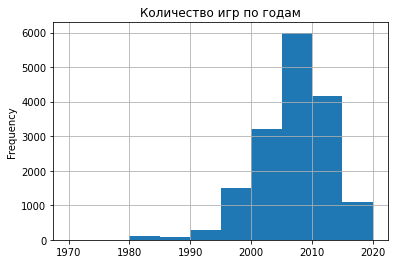

In [15]:
#Рассмотрим данные по количеству игр в разные годы

data['year_of_release'].plot(kind = 'hist', bins = 10, range = (1970, 2020), title = 'Количество игр по годам', grid = True)

Наибольшее количество игр наблюдается для периода от 2005 до 2010 года - 6000 игр. Можно заметить восходящую тенденцию от 1980 по 2010, которая затем превращается в нисходящую тенденцию

<AxesSubplot:>

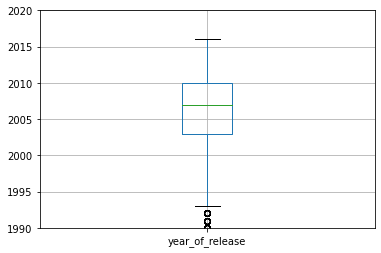

In [16]:
#рассмотрим выбросы в данном столбце:

plt.ylim(1990, 2020)
data.boxplot('year_of_release')

Можно сказать, что данные по играм до 1993 года - выбросы. Можно использовать данные от 1993 года. Медианное значение по году - 2007, при этом 50% выборки приходится на период от 2003 по 2007 год. Максимальное значение года - 2016, а наиболее ранние игры представлены от 1974 года.  

In [17]:
data['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

#### Платформа

Рассмотрим, какие платформы были наиболее популярны в разные года

Как можно заметить, за весь рассматриваемый период лидирует PS2: всего было выпущено 2 161 игра, затем идет DS - 2 151 игра и PS3 - 1 331 игра. 

Меньше всего игр выпустили студии TG16, GG и PCFX

Всего студий  - 31

In [18]:
data['platform'].value_counts().head(10)

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
Name: platform, dtype: int64

In [19]:
data['platform'].value_counts().tail(10)

GB      97
DC      52
GEN     27
NG      12
WS       6
SCD      6
3DO      3
TG16     2
PCFX     1
GG       1
Name: platform, dtype: int64

In [20]:
len(data['platform'].unique())

31

In [21]:
#отберем 10 наиболее успешных платформ

games_top = data.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head(10)

games_top

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

<AxesSubplot:title={'center':'Общие продажи по платформам'}, xlabel='platform'>

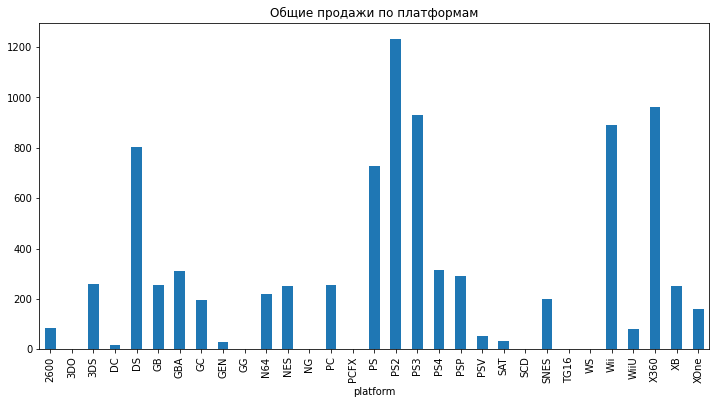

In [22]:
data.groupby('platform')['total_sales'].sum().plot(kind = 'bar', figsize=(12, 6), title = 'Общие продажи по платформам')

Наиболее прибыльные платформы - PS2, X360, PS3, Wii, DS 

In [23]:
#сделаем из этого список, который передадим в датафрейм

games_top = list(games_top.index.values)

In [24]:
#отберем из датафрейма крупные платформы

games_filtered = data[data['platform'].isin(games_top)]

#и уберем выбросы из столбца с годом - все что меньше 1993 года

games_filtered = games_filtered[games_filtered['year_of_release'] > 1993]


<AxesSubplot:title={'center':'Динамика количества выпускаемых игр'}, xlabel='year_of_release'>

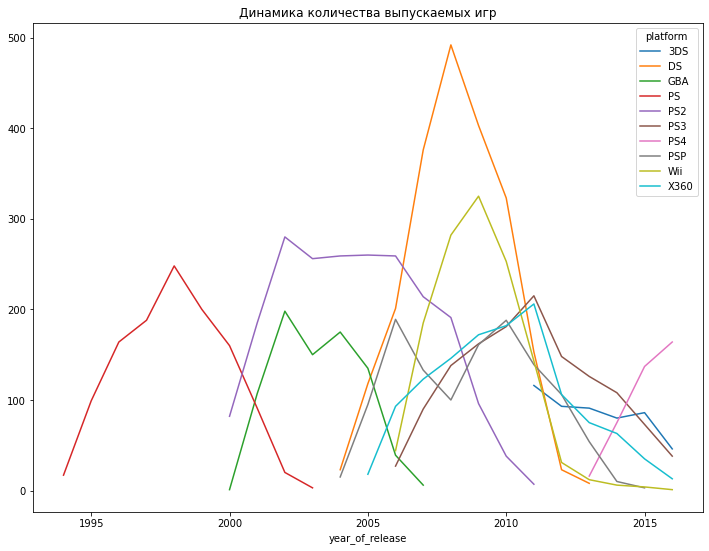

In [25]:
#построим графики динамики количества игр и общих продаж

games_filtered.groupby(['platform','year_of_release'])['name'].count().unstack('platform').plot(title = 'Динамика количества выпускаемых игр', figsize=(12, 9))

<AxesSubplot:title={'center':'Динамика продаж выпускаемых игр'}, xlabel='year_of_release'>

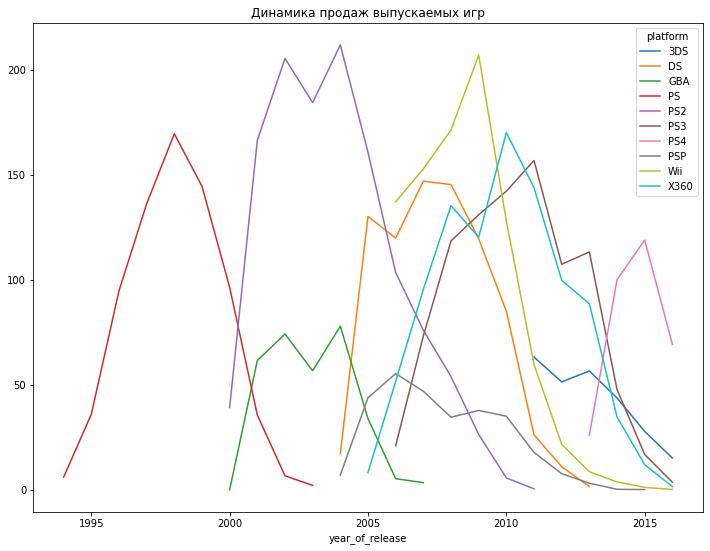

In [26]:
games_filtered.groupby(['platform','year_of_release'])['total_sales'].sum().unstack('platform').plot(title = 'Динамика продаж выпускаемых игр', figsize=(12, 9))


На графиках выше явно прослеживается следующая тенденция:
**среднее количество лет жизни платформы - 5 лет.** 

Это заметно для PS - ее годы жизни можно обозначить на промежутке с 1995 по 2000

Сразу после PS появился PS2, которая была успешна на протяжении 10 лет - с 2000 по 2010

В этот же период появились GBA XB - их годы жизни также можно обозначить пятилетним промежутком - с 2000 по 2005

Затем появились DS, Wii, PSP - их годы жизни также можно обозначить пятилетним промежутком - с 2005 по 2010 

Наконец X360, PS4 - их годы жизни наблюдаются с 2005 по 2015, что составляет 10 лет 

Предположительно, что PS4 только что прошла пик популярности, и годы ее жизни ограничатся 2013-2018 гг. 

Таким образом, рассмотрим **актуальный период за последние 5 лет** : с 2013 по 2017 г. (последний год - прогнозный)

In [27]:
#фильтруем данные - последние 4 года + 5й прогнозный

games_last_five_years = data[data['year_of_release'] >= 2013]

<AxesSubplot:title={'center':'Динамика продаж выпускаемых игр'}, xlabel='year_of_release'>

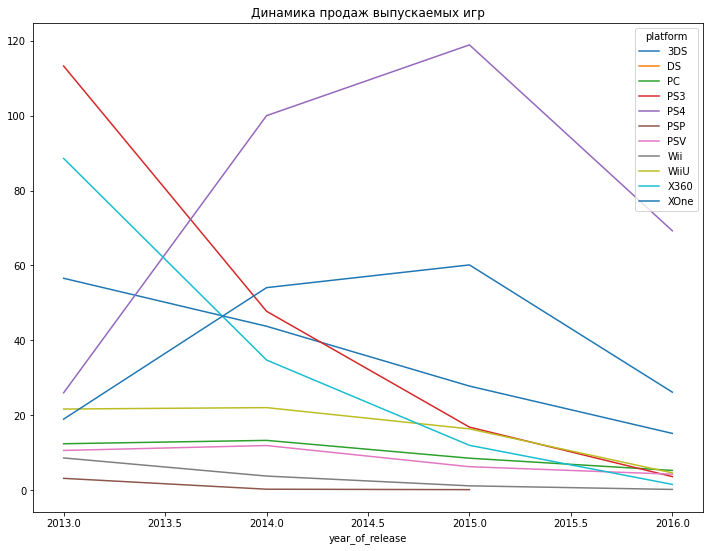

In [28]:
# построим распределение по годам 
games_last_five_years.groupby(['platform','year_of_release'])['total_sales'].sum().unstack('platform').plot(title = 'Динамика продаж выпускаемых игр', figsize=(12, 9))

На графике выше можно отметить следующее:
* завершают свой жизненный цикл платформы PS4, 3DS, XOne, при этом оставаясь в 2017 году все еще популярными (предположительно, они закончат цикл к 2018 году)
* Совсем низкие продажи наблюдаюся у PS3, X360, WiiU, PC, PSV, Wii
* Прекратились продажи PSP


* Из всех оставшихся игроков более перспективными можно считать PS4, 3DS, XOne
* Нет платформ, которые набирали бы рост: на графике все компании показывают снижение продаж
* При этом в тройке лидеров по количеству выпущенных игр за 2013-2016 гг. находятся PS4, PSV, PS3

In [29]:
games_last_five_years['platform'].value_counts()

PS4     392
PSV     358
PS3     345
3DS     303
XOne    247
PC      189
X360    186
WiiU    115
PSP      67
Wii      23
DS        8
Name: platform, dtype: int64

In [30]:
#постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам

#у большинства компаний общая сумма продаж больше 1.5 млн копий - выбросы, уберем их 

games_last_five_years_filtered =  games_last_five_years[games_last_five_years['total_sales'] < 1.5]

#отберем уникальные платформы
list_of_plaform = list(games_last_five_years_filtered['platform'].unique())

#построим цикл по всем платформам 
#for item in list_of_plaform: 
#    new_df = games_last_five_years_filtered[games_last_five_years_filtered['platform'] == item]
#    new_df.boxplot('total_sales', figsize = (4,4)).set(title=item)
#    plt.show()


Text(0.5, 1.0, 'Распределение общих продаж по платформам')

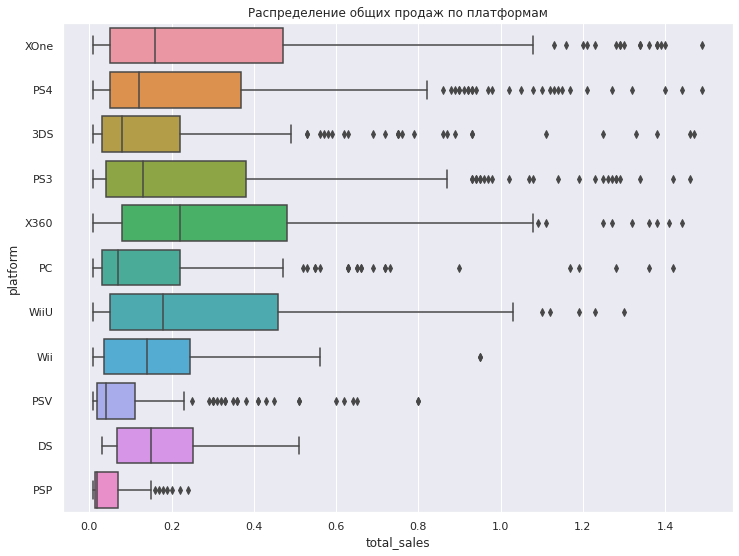

In [31]:
sns.set(rc={'figure.figsize':(12,9)}) 

sns.boxplot(x='total_sales', y='platform', data=games_last_five_years_filtered).set_title('Распределение общих продаж по платформам')

По построенным графикам можно отметить следующее: 

* В среднем (50% выборки) **PS4** в год продает 0.1 млн копий игр. Все что выше 0.8 млн копий - выбросы. 
* В среднем (50% выборки) **PS3** также в год продает 0.1 млн копий игр. Все что выше 0.8 млн копий - выбросы. 
* В среднем (50% выборки) **PC** в год продает менее 0.1 млн копий игр. Все что выше 0.4 млн копий - выбросы. 
* В среднем (50% выборки) **PC** также в год продает менее 0.1 млн копий игр. Все что выше 0.4 млн копий - выбросы.
* В среднем (50% выборки) **X360**  в год продает 0.2 млн копий игр. Все что выше 1 млн копий - выбросы. Можно сказать среди всех платформ только эта показывает хорошие результаты. Возможно это связано с тем, что платформа заканчивает свой цикл жизни. Также популярность платформы может объясняться дороговизной перехода на более новые версии.  
* В среднем (50% выборки) **Wii** в год продает примерно 0.1 млн копий игр. Все что выше 0.5 млн копий - выбросы. 
* В среднем (50% выборки) **WiiU** в год продает почти 0.2 млн копий игр. Все что выше 1.0 млн копий - выбросы. Можно сказать среди всех платформ эта также показывает хорошие результаты. Возможно это связано с тем, что платформа также заканчивает свой цикл жизни.  Также популярность платформы может объясняться дороговизной перехода на более новые версии. 
* В среднем (50% выборки) **XOne** в год продает более 0.1 млн копий игр. Все что выше 1.0 млн копий - выбросы. 
* В среднем (50% выборки) **3DS** в год продает менее 0.1 млн копий игр. Все что выше 0.5 млн копий - выбросы. 
* В среднем (50% выборки) **PSV** в год продает менее 0.05 млн копий игр. Все что выше 0.2 млн копий - выбросы. 
* В среднем (50% выборки) **DS** в год продает около 0.15 млн копий игр. 
* В среднем (50% выборки) **PSP** в год продает менее 0.02 млн копий игр. Все что выше 0.15 млн копий - выбросы.

Далее рассмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

#### Отзывы пользователей и общие продажи

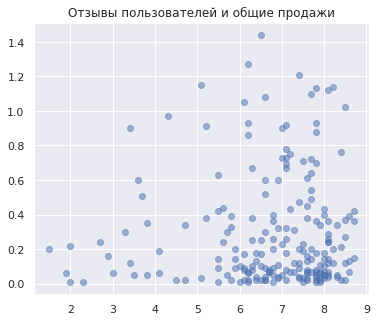

In [32]:
# выбираем платформу PS4

ps4_games = games_last_five_years_filtered[games_last_five_years_filtered['platform'] == 'PS4']

plt.figure(figsize=(6, 5))
plt.title('Отзывы пользователей и общие продажи')
plt.scatter(ps4_games['user_score'], ps4_games['total_sales'], alpha =0.5)

В целом можно выделить следующую динамику: наибольшие продажи наблюдаются у игр, набравших положительные отзывы пользователей (более 5 баллов). Большинство игр сосредоточено в области с оценками более 6, и продажи там сконцентрированы от 0 до 0.4 млн копий. 

In [33]:
#расчитаем коррелящию между отзывами пользователей и общими продажами

ps4_games[['user_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,0.023356
total_sales,0.023356,1.000000


Наблюдаемая корреляция слабая и прямая - зависимости общих продаж от оценки пользователей не наблюдается 

#### Отзывы критиков и общие продажи

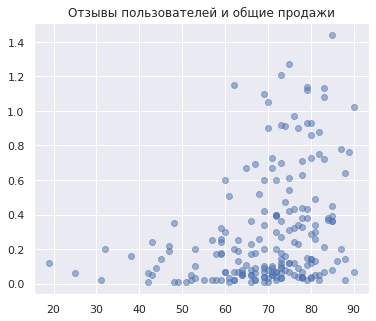

In [34]:
plt.figure(figsize=(6, 5))
plt.title('Отзывы пользователей и общие продажи')
plt.scatter(ps4_games['critic_score'], ps4_games['total_sales'], alpha =0.5)

В целом можно выделить следующую динамику: наибольшие продажи наблюдаются у игр, набравших положительные отзывы пользователей (более 50 баллов). Большинство игр сосредоточено в области с оценками более 6, и продажи там сконцентрированы от 0 до 0.4 млн копий. 

In [35]:
#расчитаем коррелящию между отзывами пользователей и общими продажами

ps4_games[['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.321616
total_sales,0.321616,1.000000


Наблюдаемая корреляция слабая и прямая - существует слабая зависимость общих продаж от оценки критиков

Рассмотрим данные тенденции для других платформ 

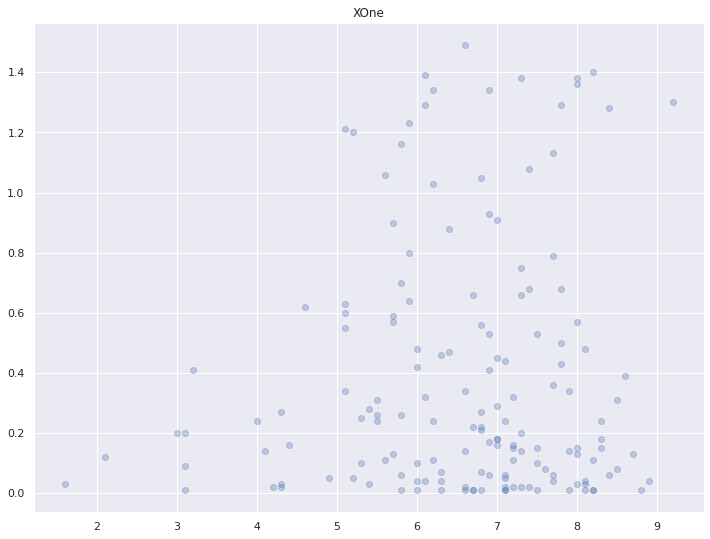

             user_score  total_sales
user_score     1.000000     0.073938
total_sales    0.073938     1.000000


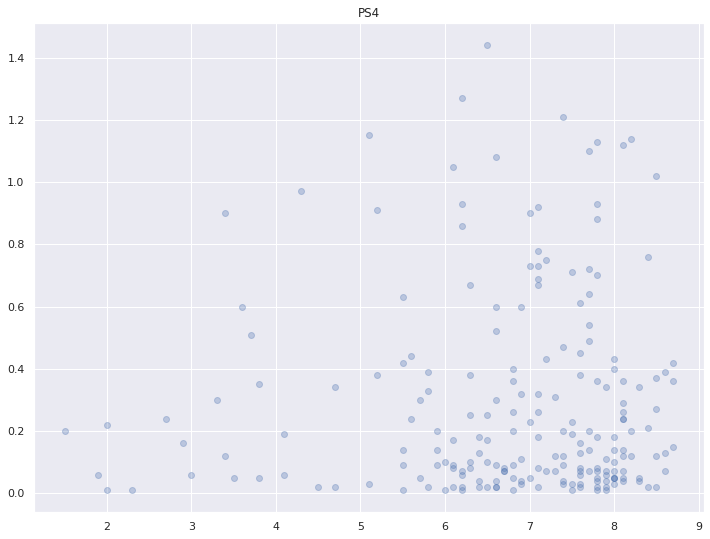

             user_score  total_sales
user_score     1.000000     0.023356
total_sales    0.023356     1.000000


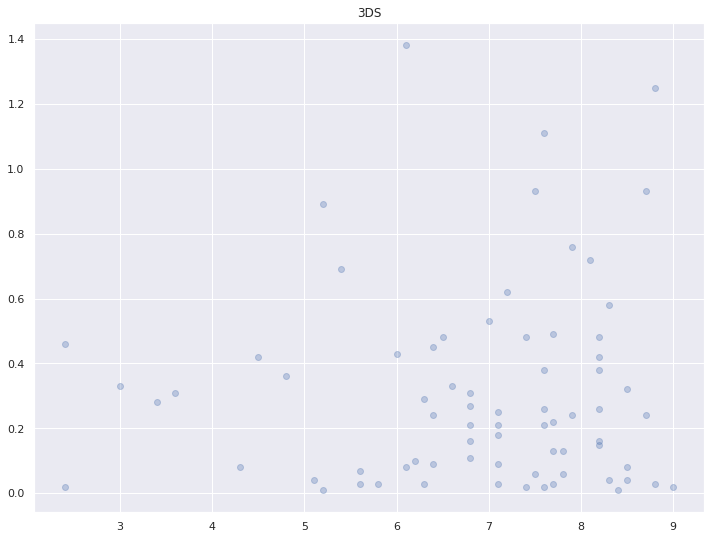

             user_score  total_sales
user_score     1.000000     0.056534
total_sales    0.056534     1.000000


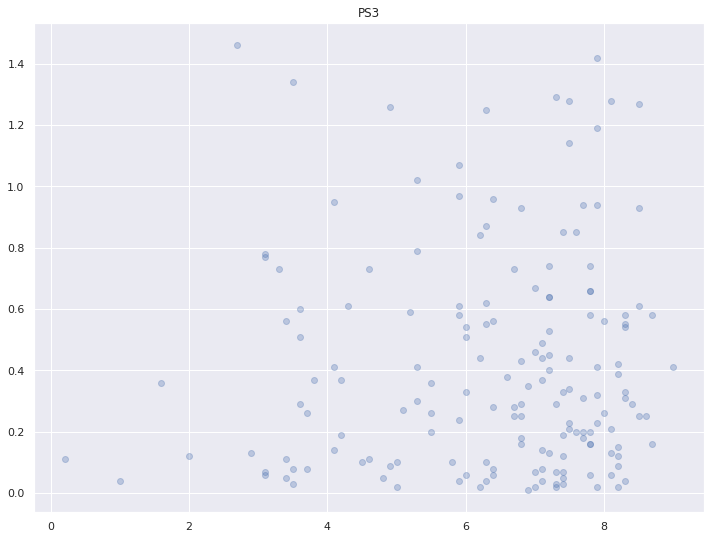

             user_score  total_sales
user_score     1.000000     0.043738
total_sales    0.043738     1.000000


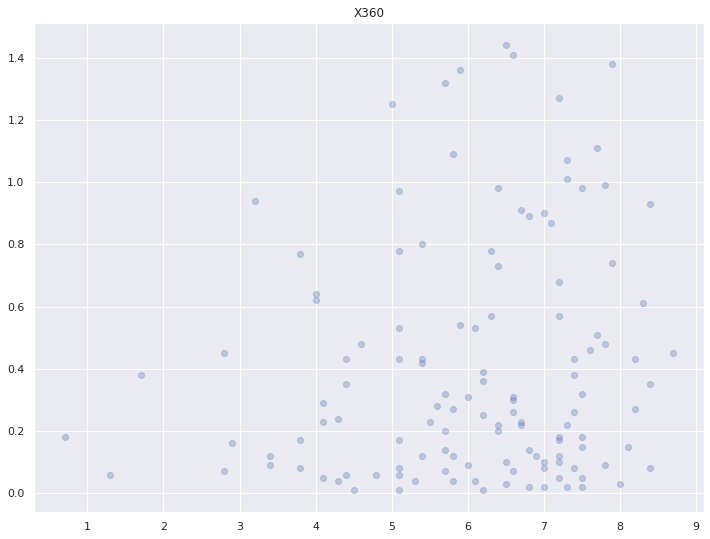

             user_score  total_sales
user_score     1.000000     0.145054
total_sales    0.145054     1.000000


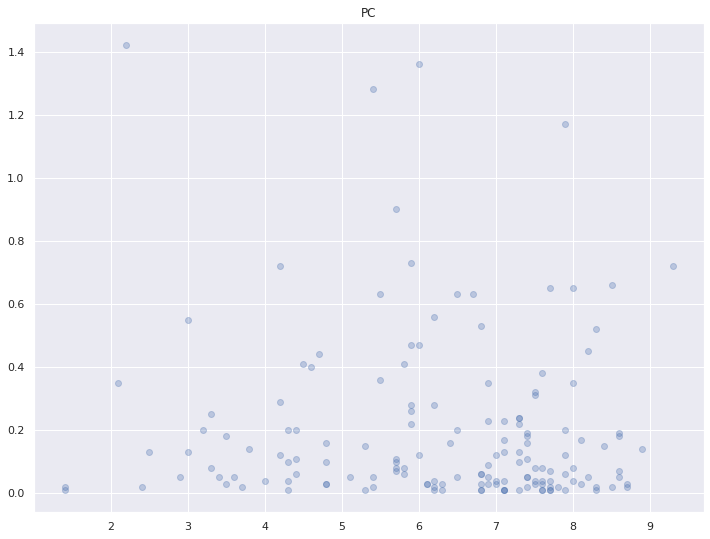

             user_score  total_sales
user_score      1.00000     -0.07009
total_sales    -0.07009      1.00000


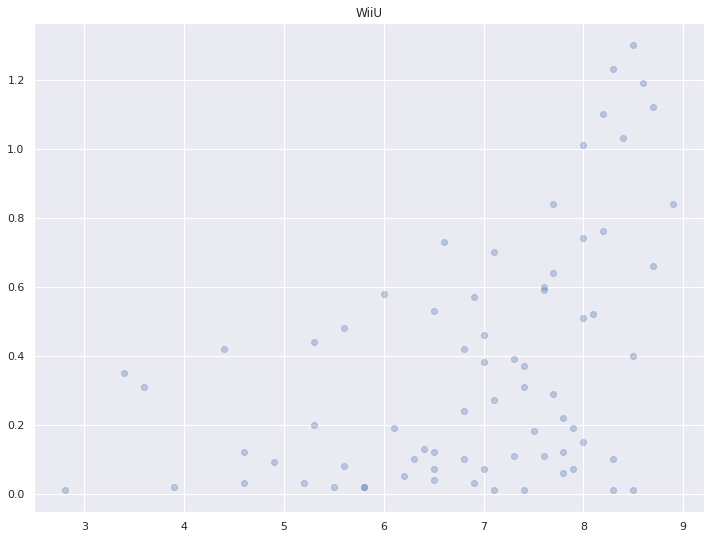

             user_score  total_sales
user_score     1.000000     0.454902
total_sales    0.454902     1.000000


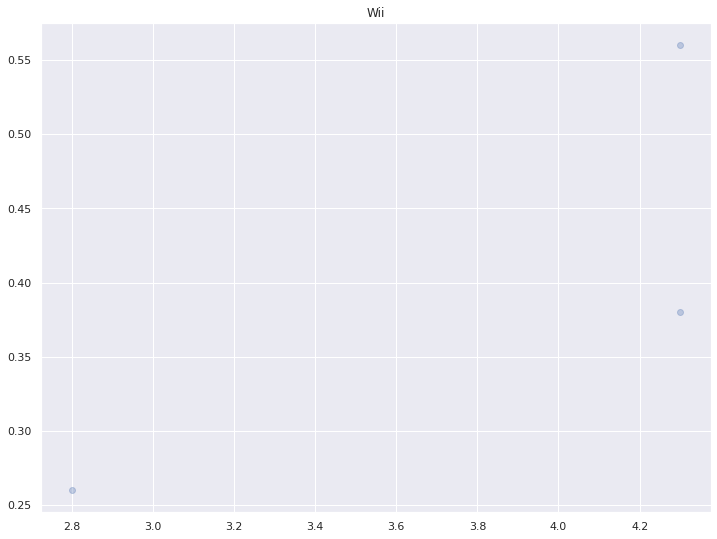

             user_score  total_sales
user_score     1.000000     0.802955
total_sales    0.802955     1.000000


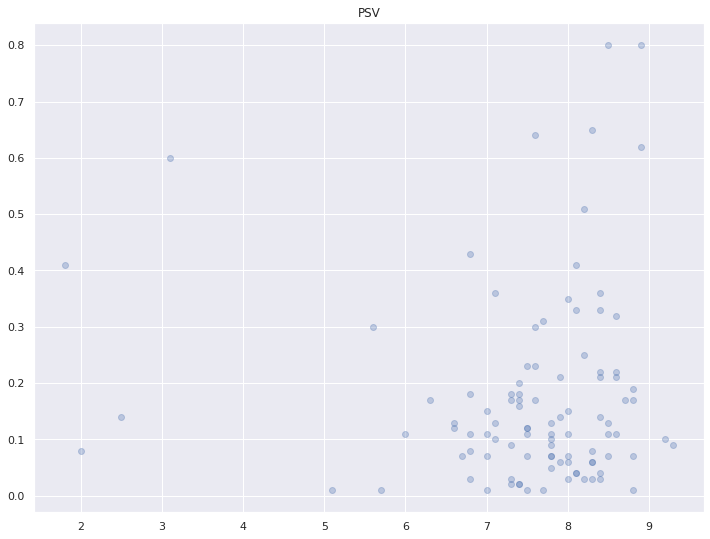

             user_score  total_sales
user_score     1.000000     0.000942
total_sales    0.000942     1.000000


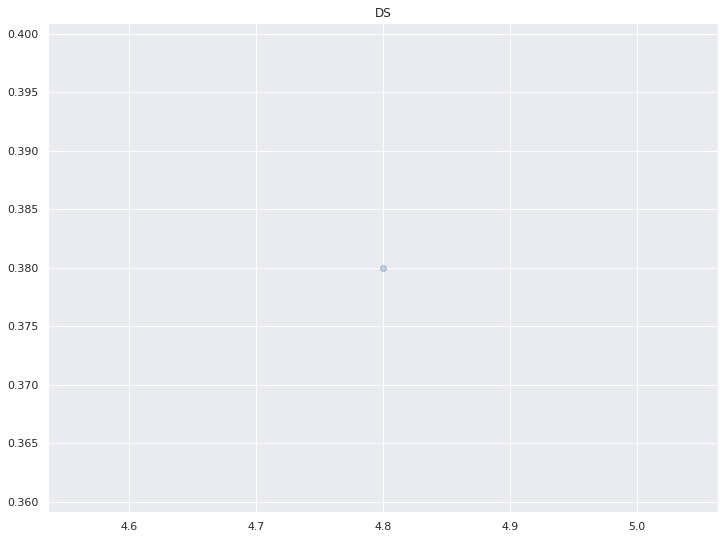

             user_score  total_sales
user_score          NaN          NaN
total_sales         NaN          1.0


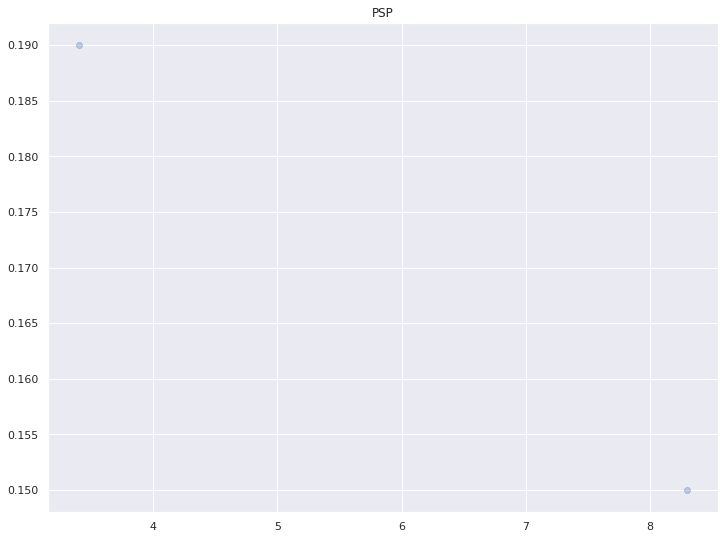

             user_score  total_sales
user_score          1.0         -1.0
total_sales        -1.0          1.0


In [36]:
#цикл, перебирающий по списку платформ, имеющих наибольшие продажи. Проверка наличия зависимости между оценкой пользователей и общими продажами  

for item in list_of_plaform: 
    new_df = games_last_five_years_filtered[games_last_five_years_filtered['platform'] == item]
    plt.scatter(new_df['user_score'], new_df['total_sales'], alpha = 0.3)
    plt.title(item)
    plt.show()
    print(new_df[['user_score', 'total_sales']].corr())

XOne - корреляция слабая и прямая - зависимости общих продаж от оценки пользователей не наблюдается

PS4 - корреляция слабая и прямая - зависимости общих продаж от оценки пользователей не наблюдается

3DS - корреляция слабая и прямая - зависимости общих продаж от оценки пользователей не наблюдается

PS3 - корреляция слабая и прямая - зависимости общих продаж от оценки пользователей не наблюдается

X360 - корреляция слабая и прямая - зависимости общих продаж от оценки пользователей не наблюдается

PC - корреляция слабая и обратная - зависимости общих продаж от оценки пользователей не наблюдается

WiiU - корреляция средняя и прямая - средняя зависимость общих продаж от оценки (это можно объяснить тем, что динамика в 
целом по годам равномерная - ни восходящия, ни нисходящая)

Wii - мало данных

PSV - корреляция слабая и прямая - зависимости общих продаж от оценки пользователей не наблюдается

DS - мало данных

PSP - мало данных


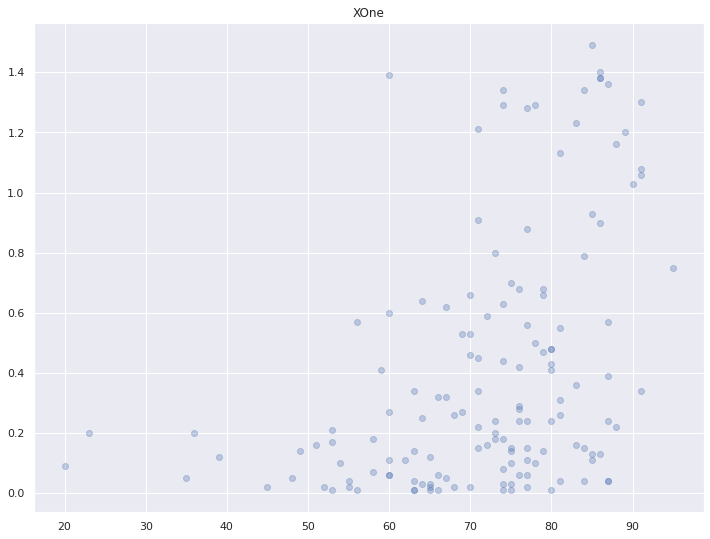

              critic_score  total_sales
critic_score      1.000000     0.423603
total_sales       0.423603     1.000000


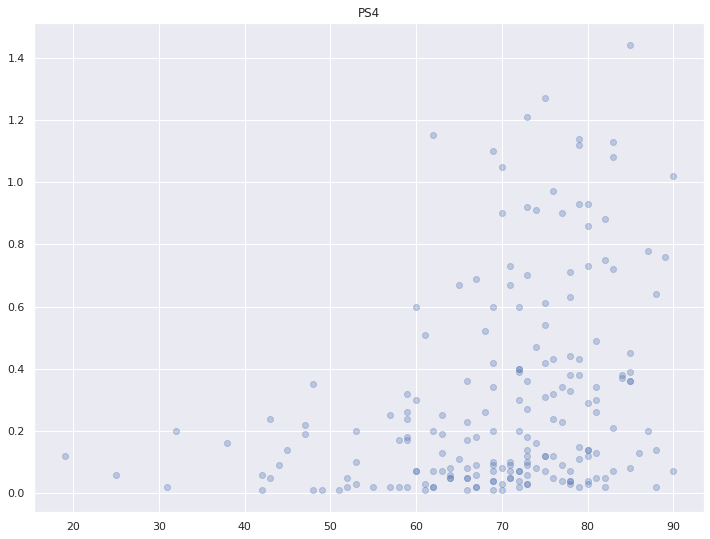

              critic_score  total_sales
critic_score      1.000000     0.321616
total_sales       0.321616     1.000000


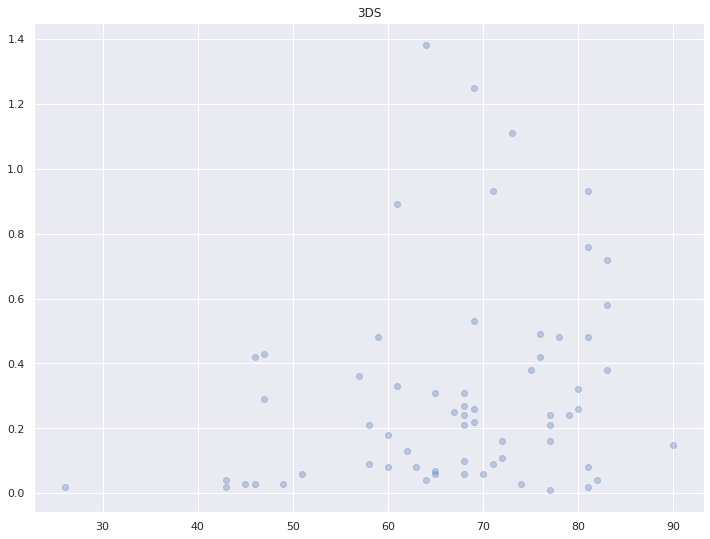

              critic_score  total_sales
critic_score      1.000000     0.231652
total_sales       0.231652     1.000000


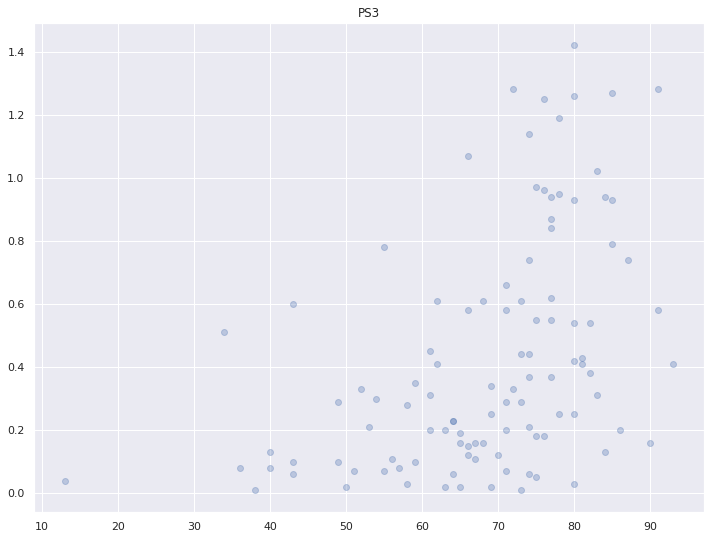

              critic_score  total_sales
critic_score      1.000000     0.452145
total_sales       0.452145     1.000000


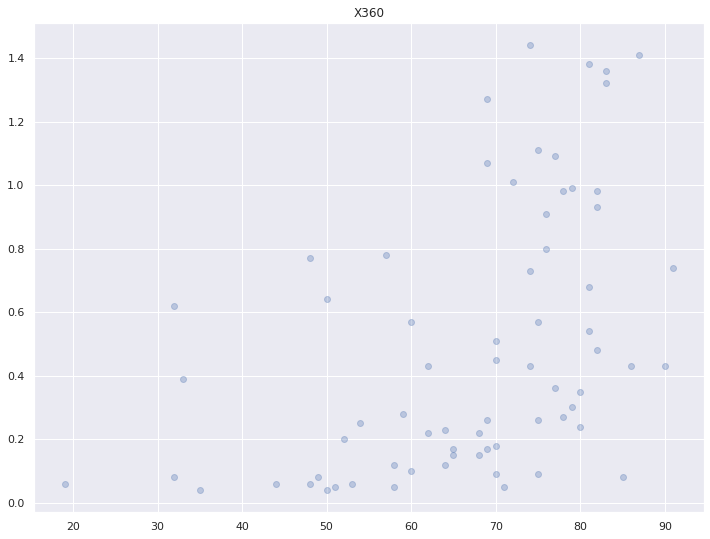

              critic_score  total_sales
critic_score      1.000000     0.458363
total_sales       0.458363     1.000000


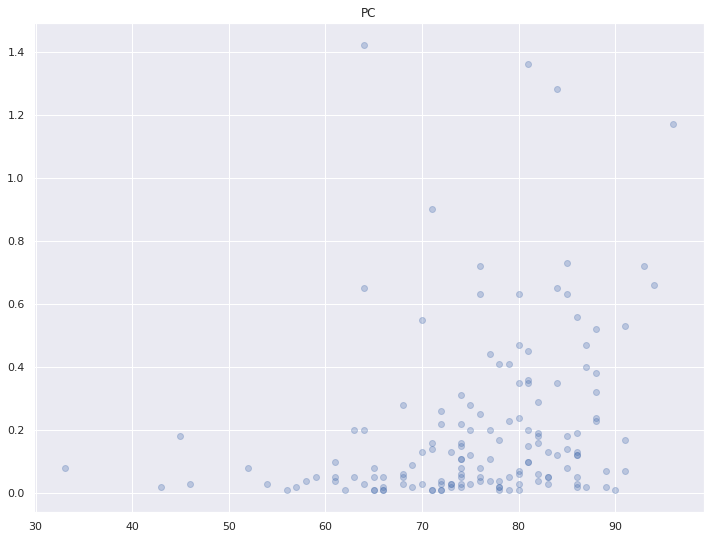

              critic_score  total_sales
critic_score      1.000000     0.277057
total_sales       0.277057     1.000000


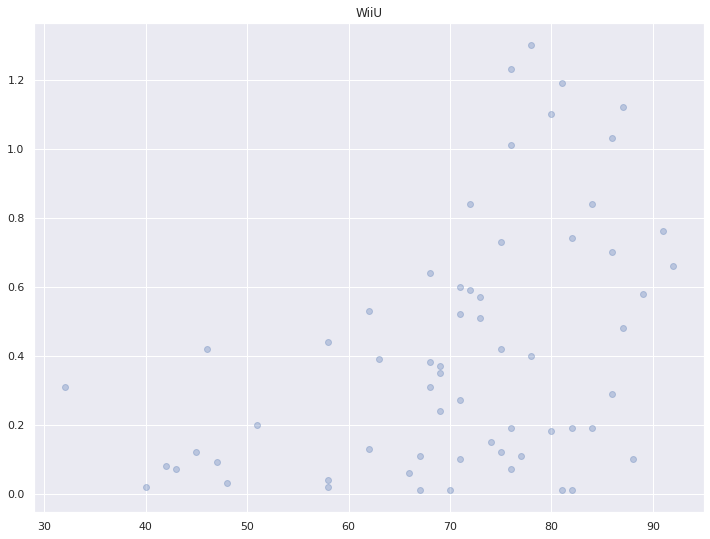

              critic_score  total_sales
critic_score      1.000000     0.433927
total_sales       0.433927     1.000000


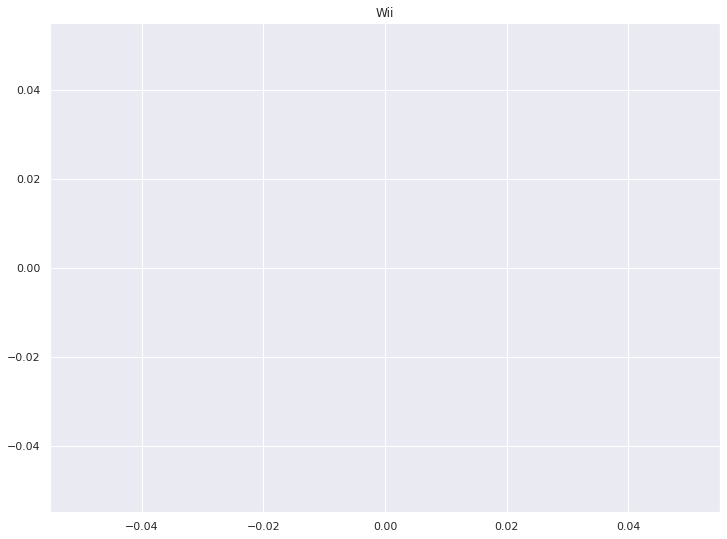

              critic_score  total_sales
critic_score           NaN          NaN
total_sales            NaN          1.0


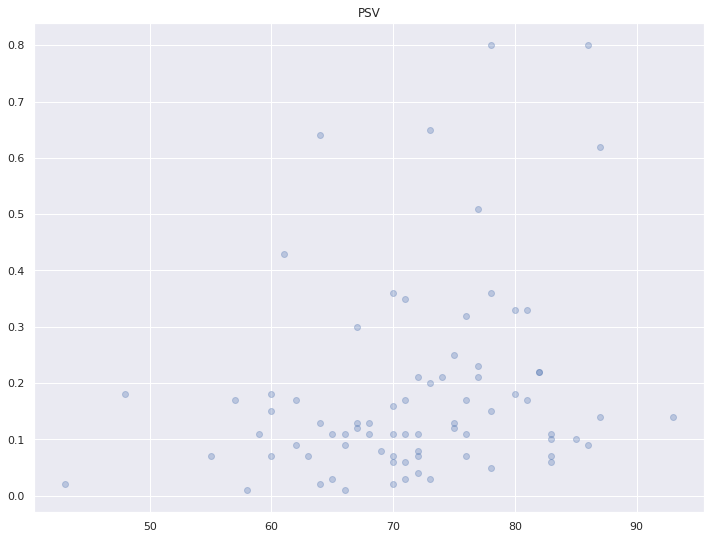

              critic_score  total_sales
critic_score      1.000000     0.254742
total_sales       0.254742     1.000000


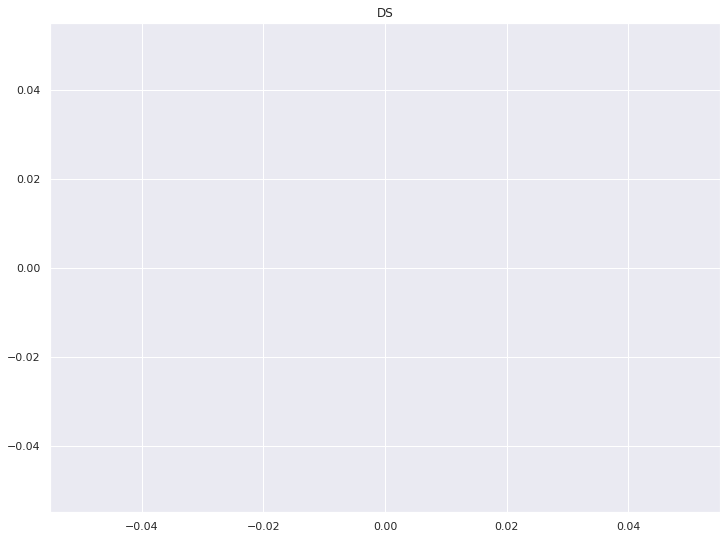

              critic_score  total_sales
critic_score           NaN          NaN
total_sales            NaN          1.0


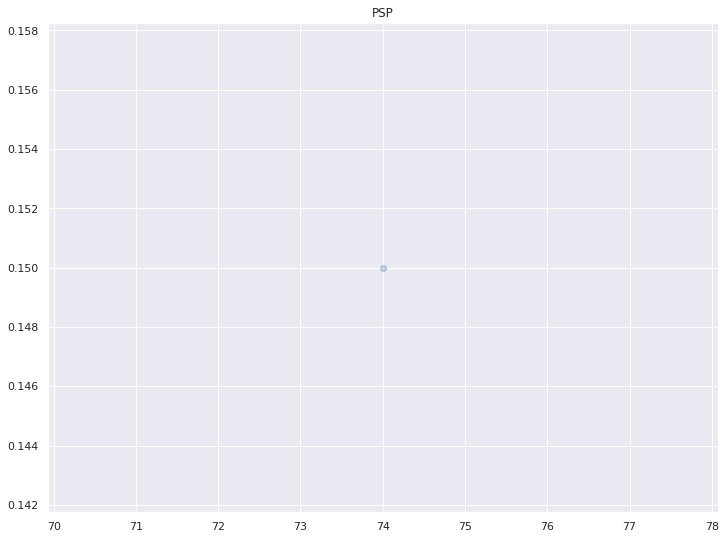

              critic_score  total_sales
critic_score           NaN          NaN
total_sales            NaN          1.0


In [37]:
#цикл, перебирающий по списку платформ, имеющих наибольшие продажи. Проверка наличия зависимости между оценкой критиков и общими продажами  

for item in list_of_plaform: 
    new_df = games_last_five_years_filtered[games_last_five_years_filtered['platform'] == item]
    plt.scatter(new_df['critic_score'], new_df['total_sales'], alpha = 0.3)
    plt.title(item)
    plt.show()
    print(new_df[['critic_score', 'total_sales']].corr())


XOne - корреляция слабая и прямая - существует слабая зависимость общих продаж от оценки критиков

PS4 - корреляция слабая и прямая - существует слабая зависимость общих продаж от оценки критиков

3DS - корреляция слабая и прямая - существует слабая зависимость общих продаж от оценки критиков

PS3 - корреляция средняя и прямая - существует средняя зависимость общих продаж от оценки критиков

X360 - корреляция средняя и прямая - существует средняя зависимость общих продаж от оценки критиков

PC - корреляция слабая и прямая - существует слабая зависимость общих продаж от оценки критиков

WiiU - корреляция слабая и прямая - существует слабая зависимость общих продаж от оценки критиков

Wii - мало данных

PSV - корреляция слабая и прямая - существует слабая зависимость общих продаж от оценки критиков

DS - мало данных

PSP - мало данных

Таким образом, можно сказать, что в целом платформы имеют слабую зависимость между оценками критиков и общими продажами: чем лучше оценка, тем больше продаж игр, что подтверждается расчетом корреляции. 

А также платформы имеют очень слабую зависимость между оценками пользователей и общими продажами и практически не связаны друг с другом, что подтвержается рассчетом корреляции

#### Общее распределение игр по жанрам

<AxesSubplot:title={'center':'Общее количество игр по жанру по годам'}, xlabel='year_of_release'>

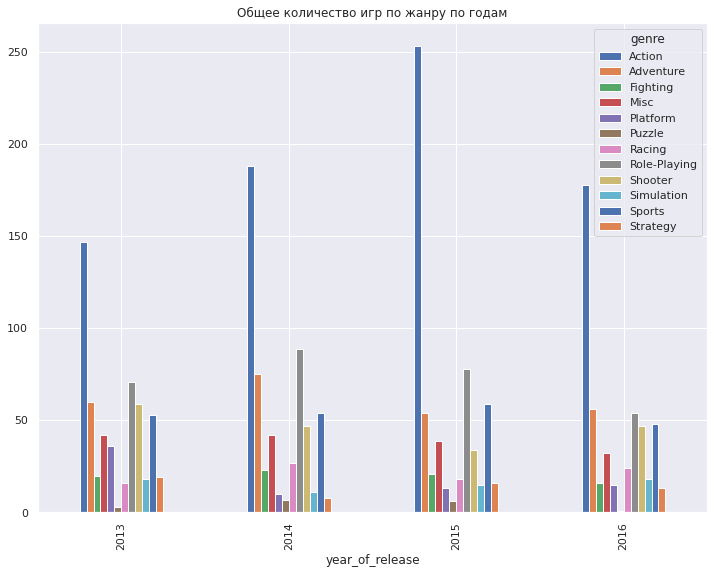

In [38]:
#общее количество игр по жанру по годам - наибольшее количество игр выпускается в жанре экшн, а наименьшее - головоломки 
games_last_five_years.groupby(['genre', 'year_of_release'])['name'].count().unstack('genre').plot(kind = 'bar', figsize = (12, 9), title = 'Общее количество игр по жанру по годам')

<AxesSubplot:title={'center':'Общие продажи по жанру по годам'}, xlabel='year_of_release'>

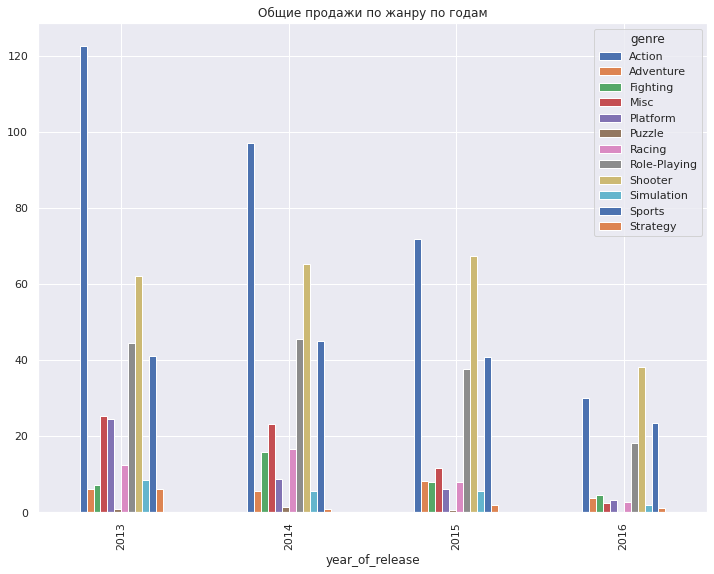

In [39]:
games_last_five_years.groupby(['genre', 'year_of_release'])['total_sales'].sum().unstack('genre').plot(kind = 'bar', figsize = (12, 9), title = 'Общие продажи по жанру по годам' )

<AxesSubplot:title={'center':'Медианные продажи по жанру по годам'}, xlabel='year_of_release'>

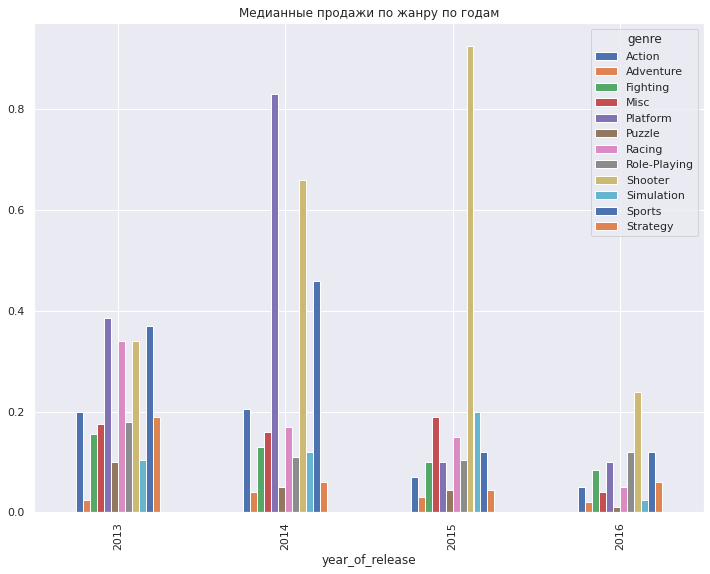

In [40]:
games_last_five_years.groupby(['genre', 'year_of_release'])['total_sales'].median().unstack('genre').plot(kind = 'bar', figsize = (12, 9), title = 'Медианные продажи по жанру по годам' )

По графику можно отметить уменьшение общих продаж игр в жанре экшн - всего за рассматриваемый период было продано более 320 млн копий.
Можно также отметить уверенный рост продаж игр в жанре шутер (если предполодить, что данные в 2016 году неполные и могут еще увеличиваться) - 233 млн копий. 
Примерно одинаковый объем продаж за все время показывает ролеплей - 146 млн копий и спортивные игры - 151 млн копий. 

Меньше всего продаются игры в жанре головоломки - 3 млн копий и стратегии - 10 млн копий.  

При рассмотрении графика медианных продаж по жанрам было обнаружено, что в 2013 гожу высокие продажи имели платформеры и спорт.Также высокие позиции занимают гонки и шутеры.  
В 2014 гожду значительно растут медианные продажи по платформерам, шутерам и спортивным играм. 
В 2015 году значительно превосходят все остальные жанры - игры шутеры - они принесли самые высокие медианные продажи за рассматриваемый период.
В 2016 году также набирают обороты щутеры. 
Остальные жанры в среднем набирают около 0.2 млн продаж в год.

Таким образом шутеры наиболее популярный жанр, который приносит большие продажи

In [41]:
games_last_five_years.groupby(['genre'])['total_sales'].sum().sort_values(ascending = False)

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: total_sales, dtype: float64

#### Вывод

В данной части был рассмотрен исследовательский анализ данных. 

* были отобраны данные без выбросов по столбцу год
* были рассмотренв продажи игр по платформам, были отобраны платформы с наибольшими суммарными продажами и построено распределение по годам. среднее количество лет жизни платформы - 5 лет, поэтому данные за актуальный период содержат 4 года значений с 2013 по 2016 год + оставляем 2017 как прогнозный без значений
* были определены платформы, которые лидируют по продажам - 
    * завершают свой жизненный цикл платформы PS4, 3DS, XOne, при этом оставаясь в 2017 году все еще популярными (предположительно, они закончат цикл к 2018 году)
    * Совсем низкие продажи наблюдаюся у PS3, X360, WiiU, PC, PSV, Wii
    * Прекратились продажи PSP

-> Из всех оставшихся игроков более перспективными можно считать PS4, 3DS, XOne

-> Нет платформ, которые набирали бы рост: на графике все компании показывают снижение продаж

-> При этом в тройке лидеров по количеству выпущенных игр за 2013-2016 гг. находятся PS4, PSV, PS3

* был построен график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Так было выяснено, что в среднем (50% выборки) платформа в год продает 0.1 млн копий игр. Все что выше 0.5 млн копий - выбросы. 
* были рассмотрены взаимосвязи между отзывами пользователей и критиков и общими продажами, были построены диаграммы рассеяния и посчитана корреляция между отзывами и продажами.  

-> можно сказать, что в целом платформы имеют слабую зависимость между оценками критиков и общими продажами: чем лучше оценка, тем больше продаж игр, что подтверждается расчетом корреляции. 
-> а также платформы имеют очень слабую зависимость между оценками пользователей и общими продажами и практически не связаны друг с другом, что подтвержается рассчетом корреляции

* было рассмотрено общее распределение игр по жанрам

-> можно отметить уменьшение общих продаж игр в жанре экшн - всего за рассматриваемый период было продано более 320 млн копий.

-> Можно также отметить уверенный рост продаж игр в жанре шутер (если предполодить, что данные в 2016 году неполные и могут еще увеличиваться) - 233 млн копий. Примерно одинаковый объем продаж за все время показывает ролеплей - 146 млн копий и спортивные игры - 151 млн копий. 

-> Меньше всего продаются игры в жанре головоломки - 3 млн копий и стратегии - 10 млн копий.

### Шаг 4
Составляем портрет пользователя

#### Северная Америка

In [42]:
games_na = data.drop(['eu_sales', 'jp_sales', 'other_sales'], axis = 'columns')

games_na = games_na[games_na['year_of_release'] > 2012]

games_na

,name,platform,year_of_release,genre,na_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,NaN,NaN,NaN,0.01


<AxesSubplot:title={'center':'Продажи по платформам в Северной Америке'}, ylabel='na_sales'>

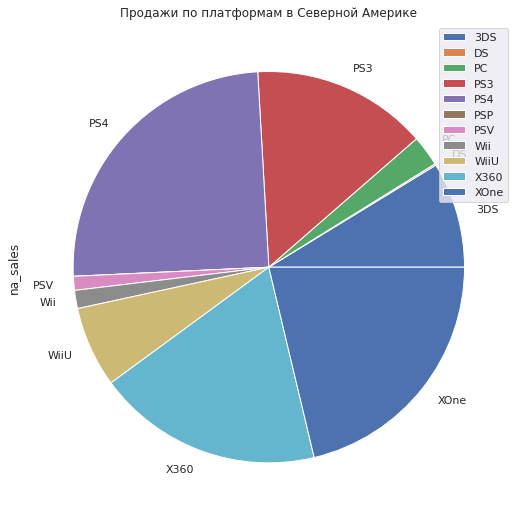

In [43]:
#найдем топ-5 платформ по продажам в Северной Америке

games_na_platform_sum = games_na.groupby('platform')['na_sales'].sum().to_frame()

total_games_na_platform_sum = games_na_platform_sum['na_sales'].sum()

games_na_platform_sum['share'] = games_na_platform_sum.apply(lambda x: 100 * x / total_games_na_platform_sum)

games_na_platform_sum.plot.pie(y = 'na_sales', title = 'Продажи по платформам в Северной Америке')

Для Северной Америки наиболее популярными платформами являются:
* PS4 - 24% общих продаж
* XOne - 21% общих продаж
* X360 - 19% общих продаж
* PS3 - 15% общих продаж
* 3DS - 9% общих продаж

Они составляют 88% общих продаж

In [44]:
games_na.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head(5).sum()/games_na['na_sales'].sum()

0.8800804185419575

<AxesSubplot:title={'center':'Продажи по жанрам в Северной Америке'}, ylabel='na_sales'>

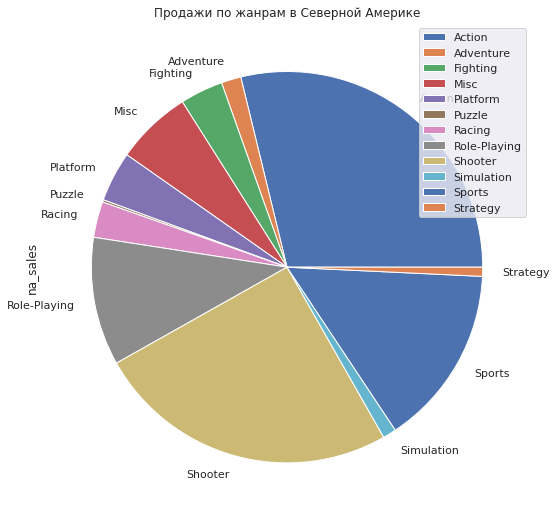

In [45]:
# cамые популярные жанры

games_na_genre_sum = games_na.groupby('genre')['na_sales'].sum().to_frame()

total_games_na_genre_sum = games_na_genre_sum['na_sales'].sum()

games_na_genre_sum['share'] = games_na_genre_sum.apply(lambda x: 100 * x / total_games_na_genre_sum)

games_na_genre_sum.plot.pie(y = 'na_sales', title = 'Продажи по жанрам в Северной Америке')

Для Северной Америки наиболее популярными платформами являются:
* экшн - 29% общих продаж
* шутеры - 25% общих продаж
* спорт - 15% общих продаж
* ролеплей - 11% общих продаж
* Misc - 6% общих продаж

Они составляют 87% общих продаж

In [46]:
games_na.groupby('genre')['na_sales'].sum().sort_values(ascending = False).head(5).sum()/games_na['na_sales'].sum()

0.856617395078934

In [47]:
#рассмотрим зависимость рейтинга ESRB на общие продажи

#если избавиться от пропущенных значений в столбце с рейтингом, останется всего 56% датасета.

len(games_na.dropna(subset = ['rating']))/len(games_na)

0.5624720107478728

In [48]:
games_na['rating'] = games_na['rating'].fillna('no_rating')

In [49]:
# cамые популярные рейтинги

games_na_rating_sum = games_na.groupby('rating')['na_sales'].sum().to_frame()

total_games_na_rating_sum = games_na_rating_sum['na_sales'].sum()

games_na_rating_sum['share'] = games_na_rating_sum.apply(lambda x: 100 * x / total_games_na_rating_sum)

games_na_rating_sum.sort_values(by = 'share', ascending = False)

,na_sales,share
rating,,
M,165.21,37.744169
no_rating,89.42,20.429051
E,79.05,18.059903
E10+,54.24,12.391766
T,49.79,11.375111


Основное предположение - рейтинг игры, которая позволяет и будет интересна подростками (все категории, от 10-17 лет), тем больше ее продажи

Самые крупные продажи наблюдаются у рейтингов:

* M (Подходит для лиц старше 17 лет.) - 38% всех продаж.
* E (Подходит для всех возрастных категорий) - 18% всех продаж, что логично, так как игру этой категории могут установить все желающие

 
Меньше всего продаж по играм рейтинга Т (Подходит для лиц старше 13 лет) - 11% всех продаж. 

Оказалось, что лучше всего продаются игры с рейтингом 17+ лет. Среди игр, лидирующих по продажам в данной категории обранужена игра "Grand Theft Auto V" - до сих пор эта игра считается одной из самых дорогих для создания и одной из самых популярных игр в мире. Это, возможно, один из ключевых факторов популярности данной категории среди пользователей. 

Игры без рейтинга занимают второе место среди всех - 20%

In [50]:
games_na[games_na['rating'] == 'M'].groupby('name')['na_sales'].sum().sort_values(ascending = False)

name
Grand Theft Auto V                    23.84
Call of Duty: Ghosts                  14.71
Call of Duty: Advanced Warfare        10.51
Battlefield 4                          6.44
Assassin's Creed IV: Black Flag        6.17
                                      ...  
Fatal Frame: Maiden of Black Water     0.00
Sniper Elite V2                        0.00
Soul Sacrifice Delta                   0.00
Steins;Gate 0                          0.00
Divinity: Original Sin                 0.00
Name: na_sales, Length: 162, dtype: float64

In [51]:
#самая популярная игра
games_na.groupby('name')['na_sales'].sum().sort_values(ascending = False)

name
Grand Theft Auto V                                     23.84
Call of Duty: Ghosts                                   14.94
Call of Duty: Black Ops 3                              12.25
Minecraft                                              11.28
Call of Duty: Advanced Warfare                         10.51
                                                       ...  
Medabots Dual: Kabuto / Kuwagata                        0.00
Medabots Girls Mission: Metabee Ver. / Rokusho Ver.     0.00
Medarot 9: Kabuto Ver. / Kuwagata Ver.                  0.00
Megpoid the Music#                                      0.00
 Beyblade Burst                                         0.00
Name: na_sales, Length: 1263, dtype: float64

#### Европа


In [52]:
games_eu = data.drop(['na_sales', 'jp_sales', 'other_sales'], axis = 'columns')

games_eu = games_eu[games_eu['year_of_release'] > 2012]

games_eu

,name,platform,year_of_release,genre,eu_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,9.09,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,5.14,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,5.86,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,4.19,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,6.31,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,NaN,NaN,NaN,0.01


<AxesSubplot:title={'center':'Продажи по платформам в Европе'}, ylabel='eu_sales'>

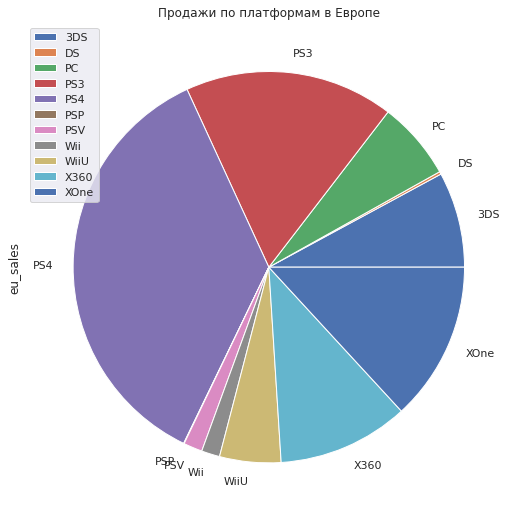

In [53]:
#найдем топ-5 платформ по продажам в Европе

games_eu_platform_sum = games_eu.groupby('platform')['eu_sales'].sum().to_frame()

total_games_eu_platform_sum = games_eu_platform_sum['eu_sales'].sum()

games_eu_platform_sum['share'] = games_eu_platform_sum.apply(lambda x: 100 * x / total_games_eu_platform_sum)

games_eu_platform_sum.plot.pie(y = 'eu_sales', title = 'Продажи по платформам в Европе')

Для Европы наиболее популярными платформами являются:
* PS4 - 36% общих продаж
* PS3 - 17% общих продаж
* XOne - 13% общих продаж
* X360 - 11% общих продаж
* 3DS - 8% общих продаж

Они составляют 85% общих продаж

In [54]:
games_eu.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head(5).sum()/games_eu['eu_sales'].sum()

0.8514647018331092

<AxesSubplot:title={'center':'Продажи по жанрам в Европе'}, ylabel='eu_sales'>

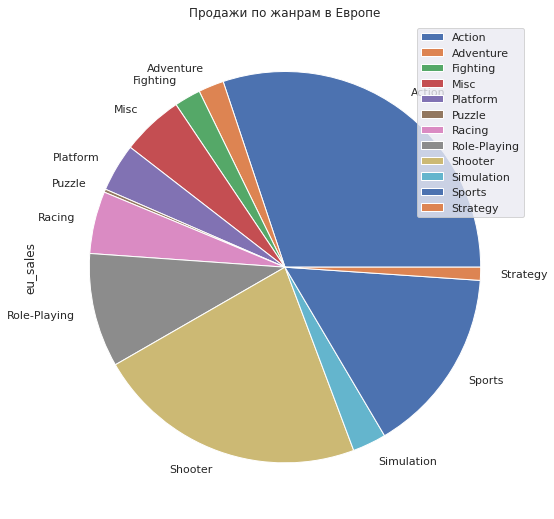

In [55]:
# cамые популярные жанры

games_eu_genre_sum = games_eu.groupby('genre')['eu_sales'].sum().to_frame()

total_games_eu_genre_sum = games_eu_genre_sum['eu_sales'].sum()

games_eu_genre_sum['share'] = games_eu_genre_sum.apply(lambda x: 100 * x / total_games_eu_genre_sum)

games_eu_genre_sum.plot.pie(y = 'eu_sales', title = 'Продажи по жанрам в Европе')

Для Европы наиболее популярными жанрами являются:
* экшн - 30% общих продаж
* шутеры - 22% общих продаж
* спорт - 15% общих продаж
* ролеплей - 9% общих продаж
* гонки - 5% общих продаж

Они составляют 82% общих продаж. 

In [56]:
games_eu.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).head(5).sum()/games_eu['eu_sales'].sum()

0.825204599342223

In [57]:
games_eu['rating'] = games_eu['rating'].fillna('no_rating')

In [58]:
# cамые популярные рейтинги

#games_eu_filtered = games_eu.dropna(subset = ['rating'])

games_eu_rating_sum = games_eu.groupby('rating')['eu_sales'].sum().to_frame()

total_games_eu_rating_sum = games_eu_rating_sum['eu_sales'].sum()

games_eu_rating_sum['share'] = games_eu_rating_sum.apply(lambda x: 100 * x / total_games_eu_rating_sum)

games_eu_rating_sum.sort_values(by = 'share', ascending = False)

,eu_sales,share
rating,,
M,145.32,37.049690
E,83.36,21.252836
no_rating,78.91,20.118298
E10+,42.69,10.883920
T,41.95,10.695255


Самые крупные продажи наблюдаются у рейтингов:

* M (Подходит для лиц старше 17 лет.) - 37% всех продаж.
* E (Подходит для всех возрастных категорий) - 21% всех продаж, что логично, так как игру этой категории могут установить все желающие

Меньше всего продаж наблюдается для категории: 
* Т (Подходит для лиц старше 10 лет) - 11% всех продаж.
* Т (Подходит для лиц старше 13 лет) - 11% всех продаж.

высокий уровень продаж категории М также может объясняться популярностью игр, вышедших в 2013-2016 гг в этой категории, в том числе из-за ГТА 5

Игры без рейтинга занимают второе место среди всех - 20%

In [59]:
#самая популярная игра
games_eu.groupby('name')['eu_sales'].sum().sort_values(ascending = False)

name
Grand Theft Auto V                               23.42
FIFA 15                                          12.02
FIFA 16                                          11.09
FIFA 14                                          10.96
Call of Duty: Black Ops 3                         9.49
                                                 ...  
Norn + Nonette: Last Era                          0.00
Norn9: Norn + Nonette                             0.00
Nyaruko-San: Nafushigatai Game no You na Mono     0.00
OZMAFIA!! -vivace-                                0.00
 Beyblade Burst                                   0.00
Name: eu_sales, Length: 1263, dtype: float64

#### Япония

In [60]:
games_jp = data.drop(['na_sales', 'eu_sales', 'other_sales'], axis = 'columns')

games_jp = games_jp[games_jp['year_of_release'] > 2012]

<AxesSubplot:title={'center':'Продажи по платформам в Японии'}, ylabel='jp_sales'>

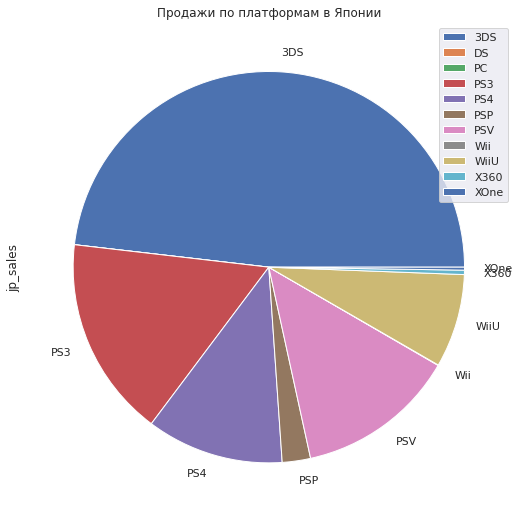

In [61]:
#найдем топ-5 платформ по продажам в Японии

games_jp_platform_sum = games_jp.groupby('platform')['jp_sales'].sum().to_frame()

total_games_jp_platform_sum = games_jp_platform_sum['jp_sales'].sum()

games_jp_platform_sum['share'] = games_jp_platform_sum.apply(lambda x: 100 * x / total_games_jp_platform_sum)

games_jp_platform_sum.plot.pie(y = 'jp_sales', title = 'Продажи по платформам в Японии')

Для Японии наиболее популярными платформами являются:
* 3DS - 48% общих продаж
* PS3 - 16% общих продаж
* PSV - 13% общих продаж
* PS4 - 11% общих продаж
* WiiU - 8% общих продаж

Они составляют 97% общих продаж.Наблюдатся высокая популярность платформы 3DS, рассмотрим, какие игры были популярны в этот момент.
На первом месте оказалась игра Pokemon X/Pokemon Y - одна из самых популярных игр Японии в период 2013-2016(была вупущена в 2013). Популярность игры непосредственно оказала влияние на популярность платформы 3DS.  

In [62]:
games_jp[games_jp['platform'] == '3DS'].groupby('name')['jp_sales'].sum().sort_values(ascending = False)

name
Pokemon X/Pokemon Y                                  4.35
Monster Hunter 4                                     3.44
Yokai Watch 2 Ganso/Honke                            3.18
Pokemon Omega Ruby/Pokemon Alpha Sapphire            3.10
Monster Hunter X                                     2.79
                                                     ... 
SpongeBob: HeroPants                                 0.00
SpongeBob SquarePants: Plankton's Robotic Revenge    0.00
Disney Planes Fire & Rescue                          0.00
Sonic Boom: Shattered Crystal                        0.00
LEGO Friends                                         0.00
Name: jp_sales, Length: 303, dtype: float64

In [63]:
games_jp.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head(5).sum()/games_jp['jp_sales'].sum()

0.9702372496093199

<AxesSubplot:title={'center':'Продажи по жанрам в Японии'}, ylabel='jp_sales'>

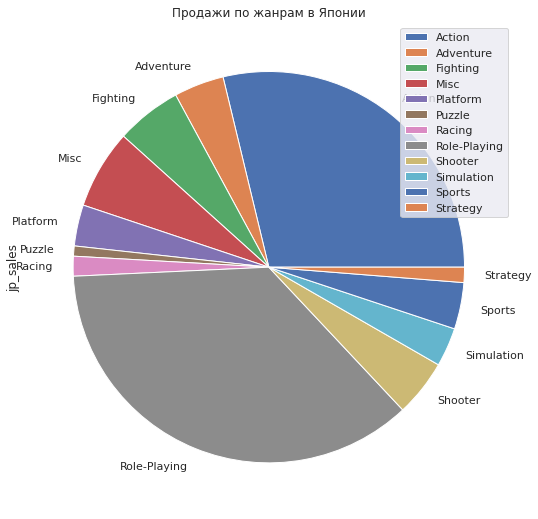

In [64]:
# cамые популярные жанры

games_jp_genre_sum = games_jp.groupby('genre')['jp_sales'].sum().to_frame()

total_games_jp_genre_sum = games_jp_genre_sum['jp_sales'].sum()

games_jp_genre_sum['share'] = games_jp_genre_sum.apply(lambda x: 100 * x / total_games_jp_genre_sum)

games_jp_genre_sum.plot.pie(y = 'jp_sales', title = 'Продажи по жанрам в Японии')

Для Японии наиболее популярными жанрами являются:
* ролеплей - 36% общих продаж
* экшн - 29% общих продаж
* Misc - 7% общих продаж
* файтинг - 5% общих продаж
* шутеры - 5% общих продаж

Они составляют 82% общих продаж. Можно заметить, что предпочтения по жанрам японских пользователей сильно отличаются от пользователей из Северной Америки и Европы: для них более предпочтительными жанрами являются ролеплей, а среди популярных также появляются файтинг.  

In [65]:
games_jp.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).head(5).sum()/games_jp['jp_sales'].sum()

0.8168063645404182

In [66]:
games_jp['rating'] = games_jp['rating'].fillna('no_rating')

In [67]:
# cамые популярные рейтинги

#games_jp_filtered = games_jp.dropna(subset = ['rating'])

games_jp_rating_sum = games_jp.groupby('rating')['jp_sales'].sum().to_frame()

total_games_jp_rating_sum = games_jp_rating_sum['jp_sales'].sum()

games_jp_rating_sum['share'] = games_jp_rating_sum.apply(lambda x: 100 * x / total_games_jp_rating_sum)

games_jp_rating_sum.sort_values(by = 'share', ascending = False)

,jp_sales,share
rating,,
no_rating,85.05,60.413411
T,20.59,14.625657
E,15.14,10.754369
M,14.11,10.022731
E10+,5.89,4.183833


Самые крупные продажи наблюдаются у рейтингов:

Все игры в основном без рейтинга - 60% всех игр 

* Т (Подходит для лиц старше 13 лет) - 15% всех продаж.
* E (Подходит для всех возрастных категорий) - 10% всех продаж, что логично, так как игру этой категории могут установить все желающие

Меньше всего продаж наблюдается для категории: 
* M (Подходит для лиц старше 17 лет) - 10% всех продаж.
* E10+ (Подходит для лиц старше 10 лет) - 4% всех продаж.

Высокий уровень продаж категории T также может объясняться популярностью игр с более консервативными сюжетами

In [68]:
#самая популярная игра
games_jp.groupby('name')['jp_sales'].sum().sort_values(ascending = False)

name
Pokemon X/Pokemon Y                          4.35
Monster Hunter 4                             3.44
Super Smash Bros. for Wii U and 3DS          3.24
Yokai Watch 2 Ganso/Honke                    3.18
Pokemon Omega Ruby/Pokemon Alpha Sapphire    3.10
                                             ... 
Monster High: New Ghoul in School            0.00
Stellaris                                    0.00
Disney Infinity                              0.00
Broken Sword 5: The Serpent's Curse          0.00
Gears of War 4                               0.00
Name: jp_sales, Length: 1263, dtype: float64

#### Выводы

Рассмотрели портрет пользователя по 3 регионам:
* Северная Америка
* Европа
* Япония

Типичный представитель североамериканского региона предпочитает играть на PS4 или Xone, любимый жанр - экшн или шутер с категорией игр с возрастными ограничениями от 17+. Любимая игра - Grand Theft Auto V. 

Типичный представитель европейского региона предпочитает играть на платформах PS4 или PS3, любимый жанр также экшн или шутер с категорией игр с возрастными ограничениями от 17+. Любимая игра - Grand Theft Auto V. 

Типичный представитель Японии предпочитает играть на платформах 3DS или PS3, любимый жанр - ролеплей или экшн с категорией игр с категорией игр с возрастными ограничениями от 13+. Любимая игра - Pokemon X/Pokemon Y. 

Оказалось, что лучше всего продаются игры с рейтингом 17+ лет. Среди игр, лидирующих по продажам в данной категории обранужена игра "Grand Theft Auto V" - до сих пор эта игра считается одной из самых дорогих для создания и одной из самых популярных игр в мире. Это, возможно, один из ключевых факторов популярности данной категории среди пользователей. 

Можно также заметить, что наибольшие продажи имеют игры с рейтингами Е, Т, М.  

Меньше всего продаж у игр с возрастной категорией 10+. 



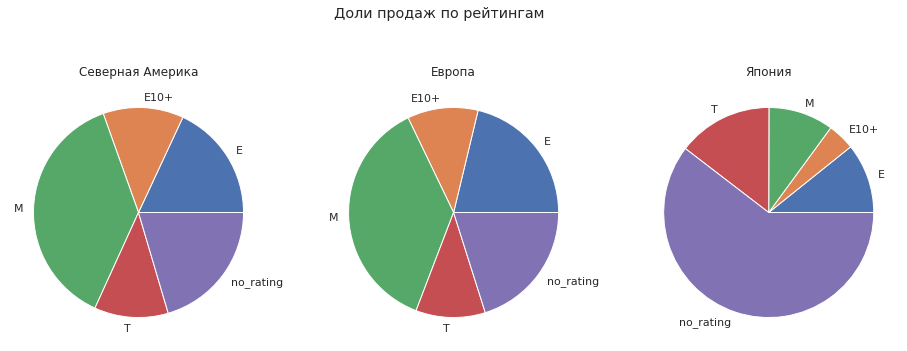

In [69]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,6))
fig.suptitle('Доли продаж по рейтингам')

list_of_labels_na = list(games_na_rating_sum.index)
list_of_labels_eu = list(games_eu_rating_sum.index)
list_of_labels_jp = list(games_jp_rating_sum.index)


ax1.pie(games_na_rating_sum['na_sales'], labels = list_of_labels_na)
ax1.set_title('Северная Америка')
ax2.pie(games_eu_rating_sum['eu_sales'], labels = list_of_labels_eu)
ax2.set_title('Европа')
ax3.pie(games_jp_rating_sum['jp_sales'], labels = list_of_labels_jp)
ax3.set_title('Япония')
    
plt.show()

Выше представлено распределение доли продаж по регионам. 
* Для Северной Америки и Европы наибольшие продажи соответствуют рейтингу М. В целом игры с рейтингом занимают более 75% общих продаж. Для жителей данных регионов важен рейтинг игр, соотвественно рейтинг игры ESRB для потребителя из Северной Америки и Европы влияет на продажи. 
* В сравнении с этими регионами Япония выделяется значительной долей продаж игр без рейтинга - почти 75% игр без рейтига ESRB. Можно сделать вывод, что наличие рейтинга для потребителя из Японии в основном не влияет на продажи игры. 

### Шаг 5: Проверка гипотез

Проверим предположение о равенстве средних пользовательских рейтингов платформ Xbox One и PC;

Далее будет использован метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам - scipy.stats.ttest_ind:
* генеральные совокупности независимые
* по ЦПТ выборочные средние нормально распределены

**Гипотеза 0**: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

**Гипотеза 1**: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые;

Укажем уровень значимости - 0,05

In [308]:
xbox_one_games = games_last_five_years_filtered[games_last_five_years_filtered['platform'] == 'XOne']['user_score'].dropna()
xbox_one_games

1274     6.6
1386     8.2
1400     6.1
1401     7.3
1403     8.0
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 155, dtype: float64

In [309]:
pc_games = games_last_five_years_filtered[games_last_five_years_filtered['platform'] == 'PC']['user_score'].dropna()
pc_games  

1351     2.2
1437     6.0
1530     5.4
1730     7.9
2303     5.7
        ... 
16456    8.3
16463    6.8
16509    7.9
16518    1.4
16692    7.6
Name: user_score, Length: 153, dtype: float64

In [310]:
from scipy import stats as st

import numpy as np

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    xbox_one_games, 
    pc_games)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.09221555627195357
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу - средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Аналогично пункту выше, для проверки воспользуемся методом для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам - scipy.stats.ttest_ind:

Проверим предположение о неравенстве средних пользовательских рейтингов жанров экшн и спорт;

Гипотеза 0: средние пользовательские рейтинги жанров экшн и спорт одинаковые;

Гипотеза 1: средние пользовательские рейтинги жанров экшн и спорт не одинаковые;

Укажем уровень значимости - 0,95

In [314]:
action_games = games_last_five_years_filtered[games_last_five_years_filtered['genre'] == 'Action']['user_score'].dropna()
action_games

1274     6.6
1330     6.5
1358     7.9
1400     6.1
1434     8.0
        ... 
16597    6.0
16652    8.5
16654    5.1
16660    6.7
16692    7.6
Name: user_score, Length: 350, dtype: float64

In [315]:
sport_games = games_last_five_years_filtered[games_last_five_years_filtered['genre'] == 'Sports']['user_score'].dropna()
sport_games

1314     2.7
1325     6.5
1462     3.5
1615     5.9
1658     7.4
        ... 
16142    8.8
16146    6.9
16450    4.5
16518    1.4
16643    6.6
Name: user_score, Length: 131, dtype: float64

In [316]:
from scipy import stats as st

import numpy as np

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    action_games, 
    sport_games)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.2896436425404313e-21
Отвергаем нулевую гипотезу


Получилось отвергнуть нулевую гипотезу - средние пользовательские рейтинги жанров игр экшн и спорт неодинаковые

#### **Основные выводы**

Для исследования был представлен датасет, содержащий исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation) из открытых источников.

В качестве основной задачи исследования можно обозначить выявление определяющих успешность игры закономерностей. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

#### Шаг 1

Первым шагом был подгружен датасет и проанализирован. Датасет содержит 16 715 строк и 11 столбцов.

Основные типы объектов - числовые с плавающей точкой (float) - 6 столбцов. Из них:

* Год релиза
* Продажи в Северной Америке (миллионы проданных копий)
* Продажи в Европе (миллионы проданных копий)
* Продажи в Японии (миллионы проданных копий)
* Прочие продажи (миллионы проданных копий)
* Оценка критиков (максимум 100)

Также присутсвует данные, которые представлены строками (object) - 5 столбцов

* Название игры
* Платформа
* Жанр
* Оценка пользователей
* Рейтинг

Названия столбцов указаны с большой буквы, для удобства приведем их к нижнему регистру. 

#### Шаг 2

В результате работы по шагу 2:

* Были заменены названия столбцов (они были приведены к нижнему регистру);
* Были преобразованы данные столбцах год релиза и оценка пользователей;
* Были отчищены пропуски в столбцах с наименованием игры и жанром;
* Были посчитаны суммарные продажи во всех регионах в столбце "total sales" - общие продажи

#### Шаг 3

В данной части был рассмотрен исследовательский анализ данных.

* были отобраны данные без выбросов по столбцу год
были рассмотрены продажи игр по платформам, были отобраны платформы с наибольшими суммарными продажами и построено распределение по годам. среднее количество лет жизни платформы - 5 лет, поэтому данные за актуальный период содержат 4 года значений с 2013 по 2016 год + оставляем 2017 как прогнозный без значений
были определены платформы, которые лидируют по продажам * завершают свой жизненный цикл платформы PS4, 3DS, XOne, при этом оставаясь в 2017 году все еще популярными (предположительно, они закончат цикл к 2018 году)
Совсем низкие продажи наблюдаюся у PS3, X360, WiiU, PC, PSV, Wii
Прекратились продажи PSP

**-> Из всех оставшихся игроков более перспективными можно считать PS4, 3DS, XOne**

-> Нет платформ, которые набирали бы рост: на графике все компании показывают снижение продаж

-> При этом в тройке лидеров по количеству выпущенных игр за 2013-2016 гг. находятся PS4, PSV, PS3

* был построен график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Так было выяснено, что в среднем (50% выборки) платформа в год продает 0.1 млн копий игр. Все что выше 0.5 млн копий - выбросы.

* были рассмотрены взаимосвязи между отзывами пользователей и критиков и общими продажами, были построены диаграммы рассеяния и посчитана корреляция между отзывами и продажами.

-> можно сказать, что в целом **платформы имеют слабую зависимость между оценками критиков и общими продажами: чем лучше оценка, тем больше продаж игр, что подтверждается расчетом корреляции.** 

-> а также **платформы имеют очень слабую зависимость между оценками пользователей и общими продажами и практически не связаны друг с другом**, что подтвержается рассчетом корреляции

* было рассмотрено общее распределение игр по жанрам: можно отметить уменьшение общих продаж игр в жанре экшн - всего за рассматриваемый период было продано более 320 млн копий.

* Можно также отметить уверенный рост продаж игр в жанре шутер (если предполоить, что данные в 2016 году неполные и могут еще увеличиваться) - 233 млн копий. Примерно одинаковый объем продаж за все время показывает ролеплей - 146 млн копий и спортивные игры - 151 млн копий.

* Меньше всего продаются игры в жанре головоломки - 3 млн копий и стратегии - 10 млн копий.

#### Шаг 4

Следующим шагом рассмотрели **портрет пользователя по 3 регионам**:

* Северная Америка
* Европа
* Япония

Типичный представитель североамериканского региона предпочитает играть на PS4 или Xone, любимый жанр - экшн или шутер с категорией игр с возрастными ограничениями от 17+. Любимая игра - Grand Theft Auto V.

Типичный представитель европейского региона предпочитает играть на платформах PS4 или PS3, любимый жанр также экшн или шутер с категорией игр с возрастными ограничениями от 17+. Любимая игра - Grand Theft Auto V.

Типичный представитель Японии предпочитает играть на платформах 3DS или PS3, любимый жанр - ролеплей или экшн с категорией игр с категорией игр с возрастными ограничениями от 13+. Любимая игра - Pokemon X/Pokemon Y.

Оказалось, что лучше всего продаются игры с рейтингом 17+ лет. Среди игр, лидирующих по продажам в данной категории обранужена игра "Grand Theft Auto V" - до сих пор эта игра считается одной из самых дорогих для создания и одной из самых популярных игр в мире. Это, возможно, один из ключевых факторов популярности данной категории среди пользователей.

Можно также заметить, что наибольшие продажи имеют игры с рейтингами Е, Т, М.

Меньше всего продаж у игр с возрастной категорией 10+.

* Для Северной Америки и Европы наибольшие продажи соответствуют рейтингу М. В целом игры с рейтингом занимают более 75% общих продаж. Для жителей данных регионов важен рейтинг игр, соотвественно рейтинг игры ESRB для потребителя из Северной Америки и Европы влияет на продажи. 
* В сравнении с этими регионами Япония выделяется значительной долей продаж игр без рейтинга - почти 75% игр без рейтига ESRB. Можно сделать вывод, что наличие рейтинга для потребителя из Японии в основном не влияет на продажи игры. 

#### Шаг 5

Завершающим шагом были рассмотрены предположения о равенстве средних пользовательских оценкок по платформам и жанрам.

* Не получилось отвергнуть нулевую гипотезу - **средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

* Получилось отвергнуть нулевую гипотезу - **средние пользовательские рейтинги жанров игр экшн и спорт неодинаковые**